## Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# To display the graphs within the notebook automatically

%matplotlib inline

In [3]:
# Define path

path = r'/Users/vanessanunezpenas/Documents/Data Analysis Projects/Airbnb Berlin Ratings/2. Data'

In [4]:
# Import Airbnb Berlin data

berlin = pd.read_csv(os.path.join(path,'Prepared','airbnb_berlin_clean.csv'))

/var/folders/ty/6wr65d8n36sc80bglktwzwyw0000gn/T/ipykernel_4717/1382111025.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  berlin = pd.read_csv(os.path.join(path,'Prepared','airbnb_berlin_clean.csv'))


## Data Preparation

In [5]:
berlin.columns

Index(['Review ID', 'Review Date', 'Reviewer ID', 'Listing ID', 'Host ID',
       'Host Since', 'Host Response Time', 'Host Response Rate',
       'Is Superhost', 'Neighborhood Group', 'Postal Code', 'Latitude',
       'Longitude', 'Is Exact Location', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price',
       'Guests Included', 'Min Nights', 'Reviews', 'First Review',
       'Last Review', 'Overall Rating', 'Accuracy Rating',
       'Cleanliness Rating', 'Checkin Rating', 'Communication Rating',
       'Location Rating', 'Value Rating', 'Instant Bookable',
       'Business Travel Ready'],
      dtype='object')

In [6]:
sub_berlin = berlin[['Listing ID','Price', 'Accommodates','Bathrooms', 'Bedrooms','Beds', 'Guests Included', 'Min Nights', 'Reviews', 'Latitude', 'Longitude']]

In [7]:
sub_berlin.shape

(451600, 11)

In [8]:
sub_berlin.head()

,Listing ID,Price,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Min Nights,Reviews,Latitude,Longitude
0,10002699,60.0,4,1.0,2.0,2.0,1,1,1,52.49234,13.42994
1,10006647,35.0,2,1.0,1.0,1.0,1,1,20,52.52134,13.41866
2,10006647,35.0,2,1.0,1.0,1.0,1,1,20,52.52134,13.41866
3,10006647,35.0,2,1.0,1.0,1.0,1,1,20,52.52134,13.41866
4,10006647,35.0,2,1.0,1.0,1.0,1,1,20,52.52134,13.41866


In [9]:
sub_berlin.isnull().sum()

Listing ID           0
Price                0
Accommodates         0
Bathrooms          936
Bedrooms           709
Beds                71
Guests Included      0
Min Nights           0
Reviews              0
Latitude             0
Longitude            0
dtype: int64

In [10]:
# Deleting rows where Bathrooms, Bedrooms and Beds are missing

sub_berlin = sub_berlin[sub_berlin['Bathrooms'].isnull() == False]
sub_berlin = sub_berlin[sub_berlin['Bedrooms'].isnull() == False]
sub_berlin = sub_berlin[sub_berlin['Beds'].isnull() == False]

In [11]:
# Clean extreme values

sub_berlin = sub_berlin[sub_berlin['Price'] < 500]

In [12]:
sub_berlin.shape

(449343, 11)

In [13]:
sub_berlin.head()

,Listing ID,Price,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Min Nights,Reviews,Latitude,Longitude
0,10002699,60.0,4,1.0,2.0,2.0,1,1,1,52.49234,13.42994
1,10006647,35.0,2,1.0,1.0,1.0,1,1,20,52.52134,13.41866
2,10006647,35.0,2,1.0,1.0,1.0,1,1,20,52.52134,13.41866
3,10006647,35.0,2,1.0,1.0,1.0,1,1,20,52.52134,13.41866
4,10006647,35.0,2,1.0,1.0,1.0,1,1,20,52.52134,13.41866


In [14]:
# Checking mixed-type data in same column

for col in sub_berlin.columns.tolist():
  weird = (sub_berlin[[col]].applymap(type) != sub_berlin[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (sub_berlin[weird]) > 0:
    print (col)

In [15]:
# Checking Duplicates
dups = sub_berlin.duplicated()
dups.sum()

430577

In [16]:
# Dropping duplicate values 

sub_berlin.drop_duplicates(keep='first', inplace=True)

In [17]:
sub_berlin.shape

(18766, 11)

In [18]:
sub_berlin.dtypes

Listing ID           int64
Price              float64
Accommodates         int64
Bathrooms          float64
Bedrooms           float64
Beds               float64
Guests Included      int64
Min Nights           int64
Reviews              int64
Latitude           float64
Longitude          float64
dtype: object

## Elbow technique

In [19]:
num_cl = range(2, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [20]:
score = [kmeans[i].fit(sub_berlin).score(sub_berlin) for i in range(len(kmeans))] 

/Users/vanessanunezpenas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vanessanunezpenas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vanessanunezpenas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vanessanunezpenas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

In [21]:
score

[-4.592372267707877e+17,
 -2.003211164019237e+17,
 -1.1345948484042349e+17,
 -7.272828919068874e+16,
 -4.915521989284899e+16,
 -3.612557267637508e+16,
 -2.8363818175436092e+16,
 -2.197910524865436e+16]

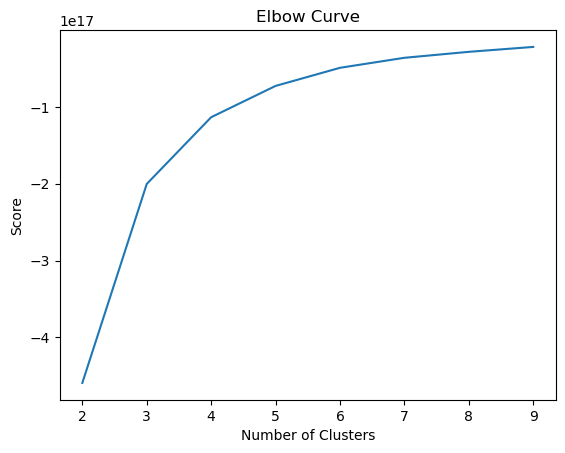

In [22]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The curve starts straighting out from 5, so this means that the optimal count for clusters would be 5. 

## K-means

In [23]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5)

In [24]:
# Fit the k-means object to the data.

kmeans.fit(sub_berlin)

/Users/vanessanunezpenas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [25]:
sub_berlin['clusters'] = kmeans.fit_predict(sub_berlin)

/Users/vanessanunezpenas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [26]:
sub_berlin.head()

,Listing ID,Price,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Min Nights,Reviews,Latitude,Longitude,clusters
0,10002699,60.0,4,1.0,2.0,2.0,1,1,1,52.49234,13.42994,1
1,10006647,35.0,2,1.0,1.0,1.0,1,1,20,52.52134,13.41866,1
21,10006747,30.0,3,1.0,1.0,2.0,1,4,2,52.56552,13.41189,1
23,10007526,30.0,4,1.0,1.0,2.0,1,3,3,52.50585,13.38580,1
26,10007952,70.0,2,1.0,1.0,1.0,1,3,1,52.45899,13.31768,1


In [27]:
sub_berlin['clusters'].value_counts()

clusters
4    4630
0    4054
2    3641
1    3380
3    3061
Name: count, dtype: int64

## Visualizations

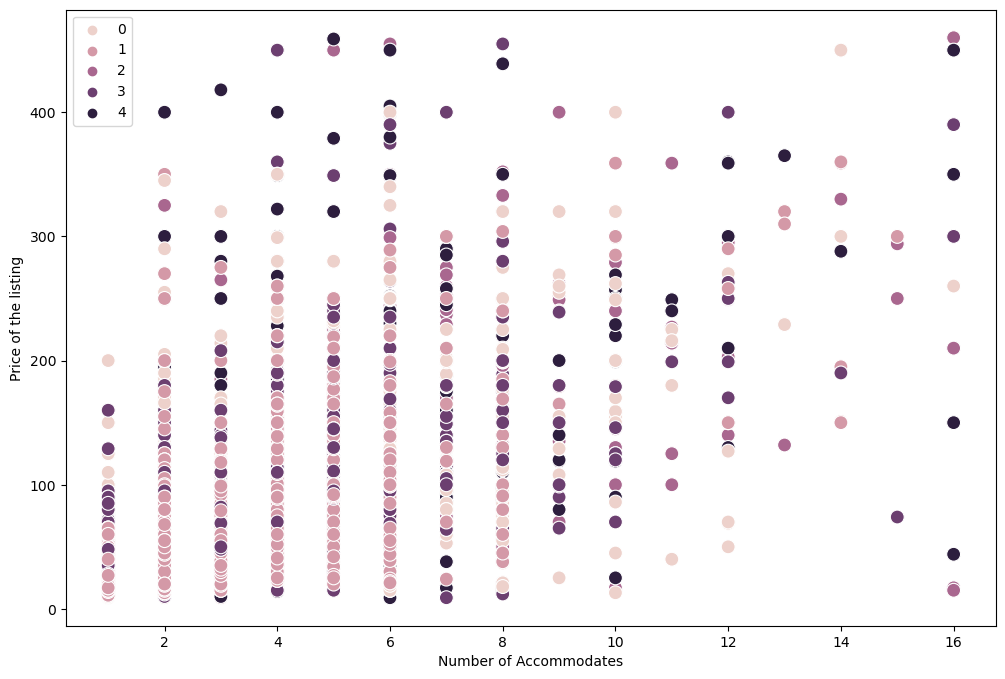

In [28]:
# Plot the clusters for the "Price" and "Accommodates" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_berlin['Accommodates'], y=sub_berlin['Price'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Accommodates') 
plt.ylabel('Price of the listing') 
plt.show()

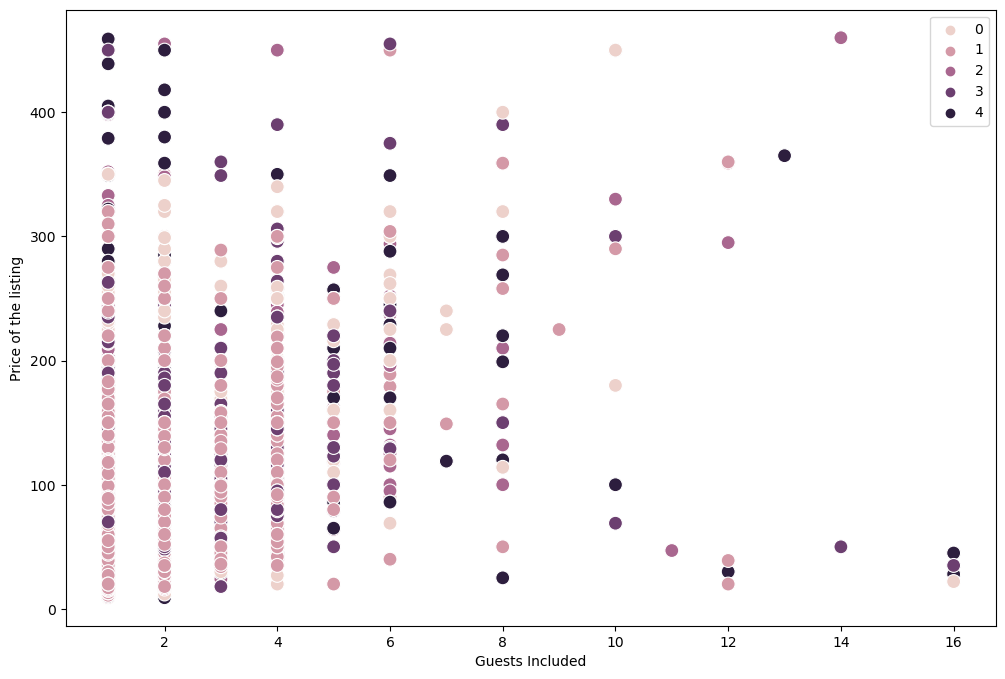

In [29]:
# Plot the clusters for the "Price" and "Guests Included" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_berlin['Guests Included'], y=sub_berlin['Price'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Guests Included') 
plt.ylabel('Price of the listing') 
plt.show()

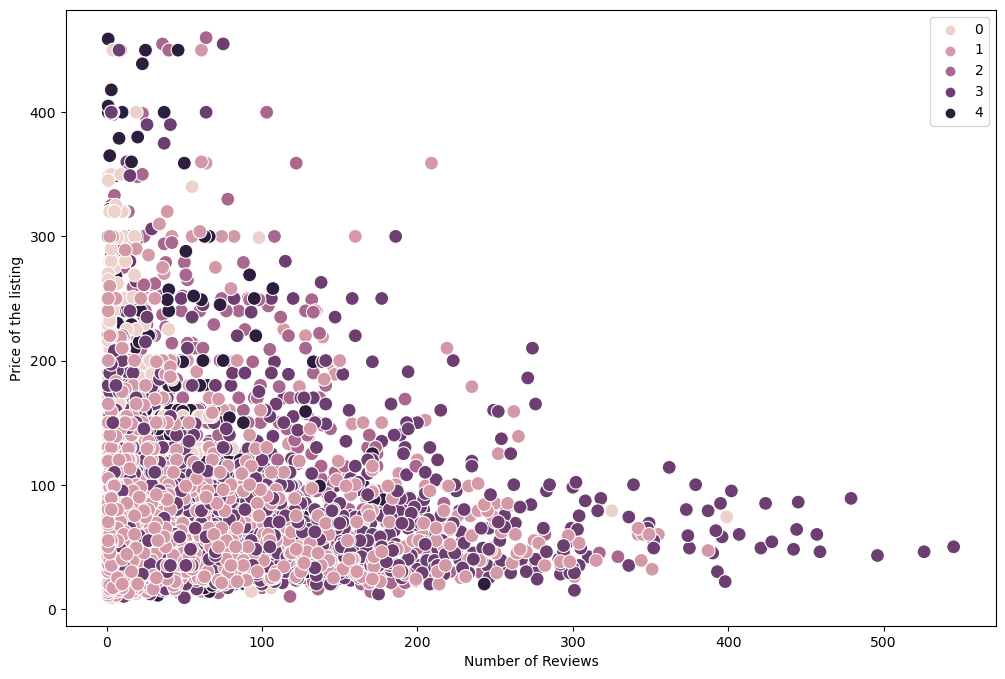

In [30]:
# Plot the clusters for the "Price" and "Reviews" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_berlin['Reviews'], y=sub_berlin['Price'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Reviews') 
plt.ylabel('Price of the listing') 
plt.show()

The first two scatterplots don't show any trend, and the different clusters are spread over the chart. It is the same as the last one, but this time, we see a different distribution of the points, with a more significant concentration in the link-down corner. 
- The dark purple clusters (3) are the listings with more reviews. 
- The lighter clusters (0-1) are the listings with fewer reviews.

## Descriptive statistics for the clusters

In [31]:
sub_berlin.loc[sub_berlin['clusters'] == 4, 'cluster'] = '4 - dark purple'
sub_berlin.loc[sub_berlin['clusters'] == 3, 'cluster'] = '3 - purple'
sub_berlin.loc[sub_berlin['clusters'] == 2, 'cluster'] = '2 - dark pink'
sub_berlin.loc[sub_berlin['clusters'] == 1, 'cluster'] = '1 - pink'
sub_berlin.loc[sub_berlin['clusters'] == 0, 'cluster'] = '0 - light pink'

In [32]:
sub_berlin.groupby('cluster').agg({'Accommodates':['mean', 'median'], 
                         'Guests Included':['mean', 'median'], 
                         'Reviews':['mean', 'median'],
                          'Bedrooms':['mean', 'median'],
                          'Price':['mean', 'median']})

Accommodates        Guests Included           Reviews         \
                        mean median            mean median       mean median   
cluster                                                                        
0 - light pink      2.735323    2.0        1.343365    1.0   8.523434    4.0   
1 - pink            2.663018    2.0        1.388166    1.0  27.350888    7.0   
2 - dark pink       2.752541    2.0        1.382038    1.0  26.039000   10.0   
3 - purple          2.857890    2.0        1.499183    1.0  51.102908   20.0   
4 - dark purple     2.616415    2.0        1.326566    1.0  15.358315    7.0   

                 Bedrooms             Price         
                     mean median       mean median  
cluster                                             
0 - light pink   1.101135    1.0  63.471386   50.0  
1 - pink         1.193195    1.0  57.443787   46.0  
2 - dark pink    1.186487    1.0  59.220544   45.0  
3 - purple       1.256125    1.0  64.825221   55.0  
4 - dark purple  1.127214    1.0  56.447516   45.0

Judging by these statistics, we can confirm that the more significant difference among the clusters is the number of reviews:
- The purple cluster (3) has the higher number of reviews and the highest range of price, followed by the pink cluster (1) in reviews, but with lower price. 
- The light pink (0) and the dark purple cluster (4) have fewer reviews, but they are different regarding the price. 

We need to explore the data further to find what is behind the differences among the listings. The listings are very similar in general terms in terms of features and price, but some have much more reviews than others. 

New questions that arise:
- Are the most popular listings localized mainly in some neighborhoods?
- Is there a difference among the hosts? 
- - Are they superhost? 
- - Do they have more than one listing to rent?

## Export the subset

In [33]:
sub_berlin.to_csv(os.path.join(path, 'Prepared', 'airbnb_berlin_clustering.csv'), index = False)